In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("Iris.csv", usecols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [19]:
X = data[['sepal_length', 'sepal_width']].values
y = data['species'].values

In [20]:
np.random.seed(42)  # For reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
train_size = int(0.8 * X.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [21]:
def min_max_scaler(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

X_train_scaled = min_max_scaler(X_train)
X_test_scaled = min_max_scaler(X_test)

In [22]:
def fit_naive_bayes(X, y):
    mean={}
    variance={}
    prior={}
    classes=np.unique(y)
    
    for c in classes:
        X_c=X[y==c]
        mean[c]=np.mean(X_c, axis=0)
        variance[c]=np.var(X_c, axis=0)
        prior[c]=len(X_c) / len(X)
    
    return mean, variance, prior, classes

In [23]:
def gaussian_pdf(x, mean, var):
    epsilon=1e-10  #small value to avoid division by zero
    numerator=np.exp(-(x - mean) ** 2 / (2 * (var + epsilon)))
    denominator=np.sqrt(2 * np.pi * (var + epsilon))
    return numerator/denominator

In [24]:
def predict_naive_bayes(X, mean, variance, prior, classes):
    predictions=[]
    for x in X:
        posteriors=[]
        for c in classes:
            prior_log = np.log(prior[c])
            likelihood = np.sum(np.log(gaussian_pdf(x, mean[c], variance[c])))
            posterior = prior_log + likelihood
            posteriors.append(posterior)
        predictions.append(classes[np.argmax(posteriors)])
    return np.array(predictions)

In [25]:
mean, variance, prior, classes = fit_naive_bayes(X_train_scaled, y_train)

In [26]:
def plot_decision_boundary(X, y, mean, variance, prior, classes):
    # Define the grid for plotting
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Make predictions on the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_naive_bayes(grid, mean, variance, prior, classes)
    
    # Convert string labels to numeric labels
    class_to_num = {cls: i for i, cls in enumerate(classes)}
    Z = np.array([class_to_num[label] for label in Z])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=[class_to_num[val] for val in y], s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Naive Bayes Decision Boundary')
    plt.show()

Naive Bayes Test Accuracy: 73.33%


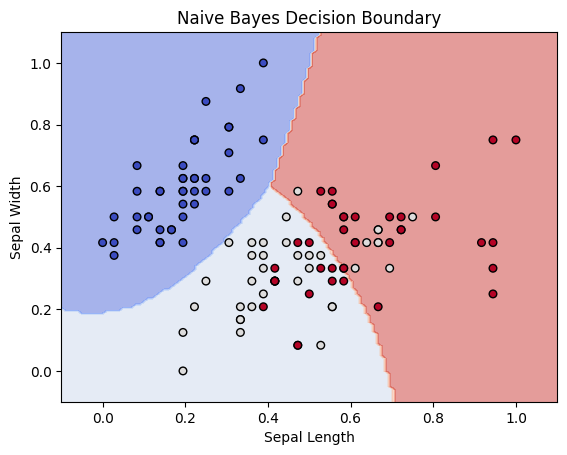

In [27]:
y_pred = predict_naive_bayes(X_test_scaled, mean, variance, prior, classes)

accuracy = np.mean(y_pred == y_test)
print(f'Naive Bayes Test Accuracy: {accuracy * 100:.2f}%')

plot_decision_boundary(X_train_scaled, y_train, mean, variance, prior, classes)